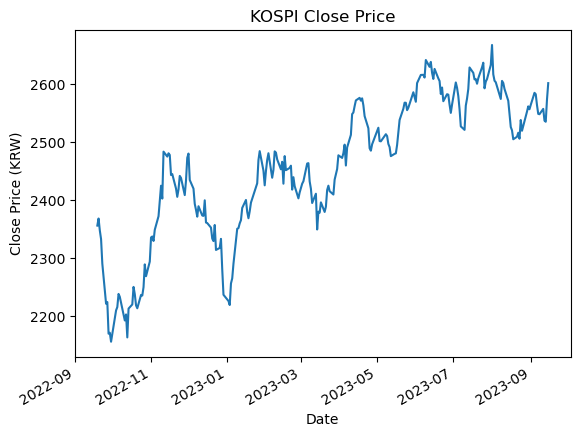

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Yahoo Finance에서 KOSPI 종가 데이터 가져오기
kospi = yf.Ticker("^KS11")
kospi_data = kospi.history(start="2022-09-17", end="2023-09-17")['Close']

# 종가 그래프 그리기
kospi_data.plot()
plt.title('KOSPI Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.show()

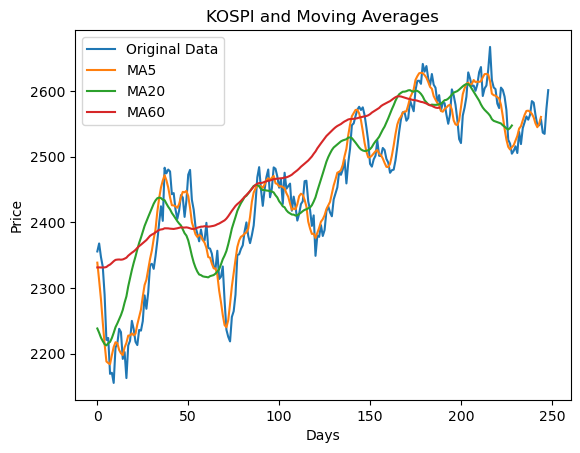

In [25]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# 이동 평균 함수
def MA(D, m, label):
    L = []
    n = len(D)
    mm = int(m / 2)
    for t in range(mm, n - mm):
        vt = np.mean(D[t-mm:t+mm+1])
        L.append(vt)
    plt.plot(L, label=label)

# Yahoo Finance에서 KOSPI 데이터 가져오기
kospi = yf.Ticker("^KS11")

# 지정한 날짜 범위의 데이터를 가져옴
kospi_data = kospi.history(start="2022-09-17", end="2023-09-17")['Close'].values

# 원본 데이터 그래프
plt.plot(kospi_data, label="Original Data")

# 이동 평균 그래프
MA(kospi_data, 5, "MA5")
MA(kospi_data, 20, "MA20")
MA(kospi_data, 60, "MA60")

# 레이블과 제목 달기
plt.legend()
plt.title('KOSPI and Moving Averages')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


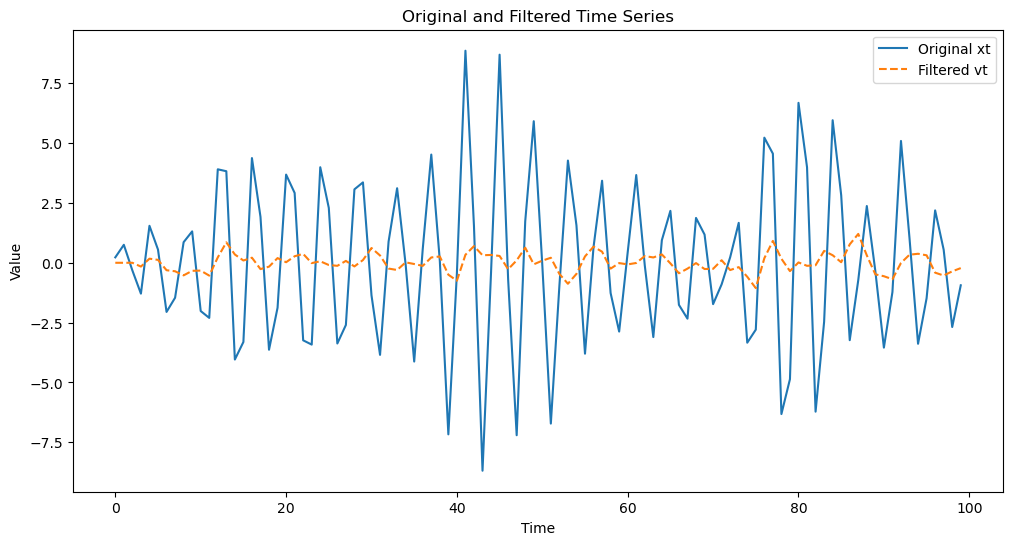

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 초기화
n = 100
sigma_w = 1
x = np.zeros(n)
w = np.random.normal(0, sigma_w, n)

# Generate AR process: xt = -0.9 * xt-2 + wt
x[0] = w[0]
x[1] = w[1]
for t in range(2, n):
    x[t] = -0.9 * x[t - 2] + w[t]

# moving average filter: vt = (xt + xt-1 + xt-2 + xt-3) / 4
v = np.zeros(n)
for t in range(3, n):
    v[t] = (x[t] + x[t - 1] + x[t - 2] + x[t - 3]) / 4

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(x, label='Original xt', linestyle='-')
plt.plot(v, label='Filtered vt', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original and Filtered Time Series')
plt.legend()
plt.show()

In [32]:
## 8-(a)
def AutoCov(D):
    L = []
    y = D
    n = len(y)
    mu = np.mean(y)
    for h in range(0,20):
        Lh = []
        for t in range(0,n-h):
            ac = (y[t+h]-mu)*(y[t]-mu)
            Lh.append(ac)
        autocov_h = sum(Lh)/n
        L.append(autocov_h)
    return L

#Autocorr function
def SACF(D):
    Autocov = AutoCov(D)
    SACF = Autocov/Autocov[0]
    return SACF

In [34]:
# Xt 생성 
xt = np.random.normal(0, 1, 500)

In [38]:
#Autocovariance function
auto_cov = AutoCov(xt)
print(auto_cov)

[1.002339598485474, -0.027930682256718718, -0.014300123641310678, 0.029610064234813178, -3.851069905912685e-05, -0.05368670144280117, 0.0019086509274192044, 0.09786357047971675, -0.03640768049097221, 0.00524721458042504, 0.028103689056350824, 0.003097180861790402, -0.0658186320930777, 0.0491591391545718, 0.009086467621327192, 0.00010273361349557142, 0.013812963975098277, 0.03448442698888355, 0.004861733647629102, 0.007736829651748313]


In [39]:
#Autocorelation function
auto_corr = SACF(xt)
print(auto_corr)

[ 1.00000000e+00 -2.78654882e-02 -1.42667452e-02  2.95409503e-02
 -3.84208098e-05 -5.35613893e-02  1.90419587e-03  9.76351434e-02
 -3.63227000e-02  5.23496686e-03  2.80380912e-02  3.08995162e-03
 -6.56650024e-02  4.90443950e-02  9.06525856e-03  1.02493819e-04
  1.37807226e-02  3.44039356e-02  4.85038569e-03  7.71877083e-03]


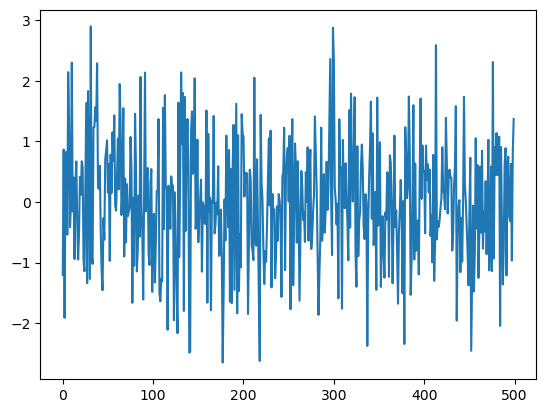

In [37]:
plt.plot(xt)
plt.show()

In [40]:
## 8-(b)
xt = np.random.normal(0, 1, 50)

#Autocovariance function
auto_cov = AutoCov(xt)
print(auto_cov)

[1.1630552016456388, -0.13368814020579767, 0.03745129367689274, 0.20796561796817173, -0.30269008151915044, 0.31928748835386894, -0.02726621426130322, -0.20416932604089197, -0.016926449064938266, -0.021926883289513293, -0.04215410517088905, -0.052661356042776185, -0.13677771988527032, -0.22296073128569593, 0.11313397893485767, 0.11866530746771925, -0.1801298926726265, -0.11785733582006223, -0.0463106649796792, 0.019588116549833865]


In [41]:
#Autocorelation function
auto_corr = SACF(xt)
print(auto_corr)

[ 1.         -0.11494565  0.03220079  0.17880976 -0.26025427  0.27452479
 -0.02344361 -0.17554569 -0.01455344 -0.01885283 -0.03624429 -0.04527847
 -0.11760209 -0.19170262  0.09727309  0.10202896 -0.15487648 -0.10133426
 -0.03981811  0.01684195]


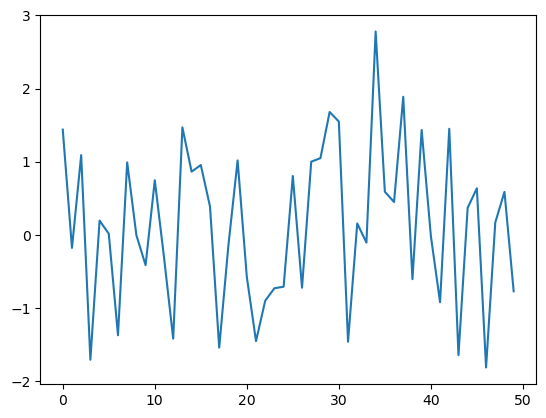

In [43]:
plt.plot(xt)
plt.show()

In [44]:
# 9-(a)
def MA(D):
    L = []
    n = len(D)
    for t in range(1,n-1):
        vt=np.mean(D[t-1:t+2])
        L.append(vt)
    return L

In [45]:
xt = np.random.normal(0, 1, 500)

#MV
MA_xt = MA(xt)

In [46]:
#Autocovariance function
auto_cov = AutoCov(MA_xt)
print(auto_cov)

[0.3551633864080313, 0.24476570331128125, 0.13290086895498163, 0.02470548636679967, 0.02833270160357074, 0.021062192921062463, 0.003296507788051864, -0.012851866483132338, -0.00892613099364884, 0.010605144470312283, 0.022643202338006246, 0.024266593259832946, 0.014883680875263447, 0.0016893213796759022, -0.008493963905535497, -0.018098480438063343, -0.014244060733410235, -0.014590443268606226, -0.013585444505359517, -0.018852497340942072]


In [47]:
#Autocorelation function
auto_corr = SACF(MA_xt)
print(auto_corr)

[ 1.          0.68916367  0.37419642  0.0695609   0.07977371  0.05930283
  0.00928167 -0.03618579 -0.02513246  0.0298599   0.06375433  0.06832515
  0.04190657  0.00475646 -0.02391565 -0.05095818 -0.04010566 -0.04108093
 -0.03825125 -0.0530812 ]


<function matplotlib.pyplot.show(close=None, block=None)>

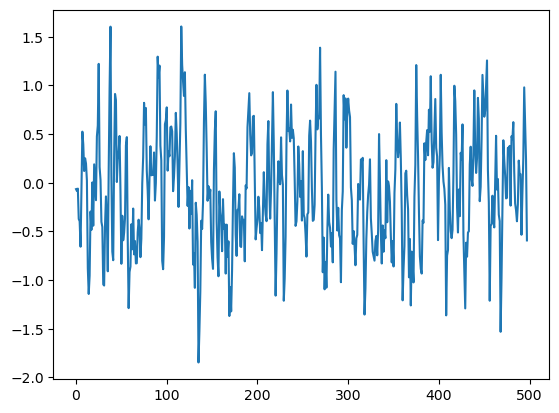

In [48]:
plt.plot(MA_xt)
plt.show

In [49]:
# 9-(b)
# Xt 생성 
xt = np.random.normal(0, 1, 50)
#moving avaerage
ma_xt = MA(xt)

In [50]:
#Autocovariance function
auto_cov = AutoCov(ma_xt)
print(auto_cov)

[0.5656189230376838, 0.43755358525360233, 0.3322877157936939, 0.1511791052697963, 0.06171205988798011, -0.019216794406366904, -0.06804107503178873, -0.04647184235937007, -0.042610564221756735, -0.0008949237946294051, -0.032649390265760386, -0.04233763928202808, -0.09149939195554545, -0.1095080500059087, -0.14409931970011844, -0.14288468341957533, -0.12666726385188828, -0.08088955989702214, -0.07762735140145043, -0.08326662731119096]


In [51]:
#Autocorelation function
auto_corr = SACF(ma_xt)
print(auto_corr)

[ 1.          0.77358371  0.58747631  0.26728085  0.10910537 -0.03397481
 -0.12029491 -0.08216105 -0.0753344  -0.0015822  -0.0577233  -0.07485188
 -0.16176862 -0.19360747 -0.25476397 -0.25261652 -0.22394453 -0.1430107
 -0.1372432  -0.1472133 ]


<function matplotlib.pyplot.show(close=None, block=None)>

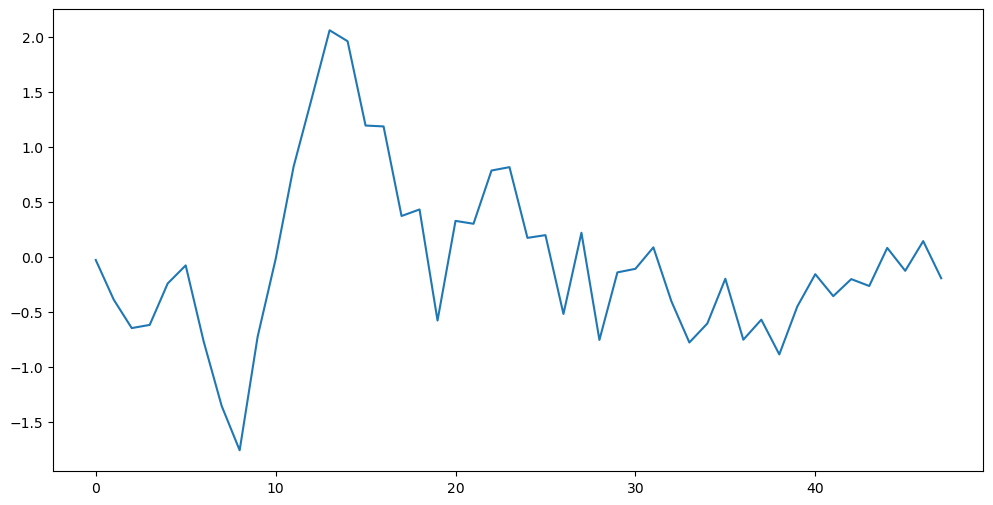

In [52]:
plt.figure(figsize=(12,6))
plt.plot(ma_xt)
plt.show